# Data Understanding and Exploratory Data Analysis (EDA)

This notebook focuses on:
1.  **Data Understanding**: Loading, inspection, and missing value analysis.
2.  **Feature Engineering**: Creating text-based and time-based features.
3.  **Exploratory Data Analysis (EDA)**: Visualizing distributions, correlations, and text patterns.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Set plot style
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

## 1. Load Data

In [34]:
try:
    df = pd.read_csv('../data/all_reviews_merged.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the path.")

Data loaded successfully.


## 2. Data Inspection and Missing Values

In [35]:
# Display head and info
display(df.head())
df.info()

,course_name,course_id,review_id,content,rating,created,user_name
0,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,226057033,"Yes, the explanations are clear so far. I like...",4.0,2026-01-07T13:40:45-08:00,Eben-Ezer Dabire
1,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225873787,"amazing course...covers everything in detail, ...",5.0,2026-01-06T00:27:14-08:00,Shalin Garg
2,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225557731,affordable and good quality contents,4.5,2026-01-01T21:58:12-08:00,Rahul Shaw
3,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225401611,This is a very good course on Udemy that expla...,5.0,2025-12-30T10:03:44-08:00,Akash Gupta
4,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225181813,"In the Spark videos, there is a lack of explan...",4.0,2025-12-28T03:58:14-08:00,Menda Thavitinaidu


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8251 entries, 0 to 8250
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   course_name  8251 non-null   object 
 1   course_id    8251 non-null   int64  
 2   review_id    8251 non-null   int64  
 3   content      8226 non-null   object 
 4   rating       8251 non-null   float64
 5   created      8251 non-null   object 
 6   user_name    8251 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 451.4+ KB


Missing Values Summary:
         Missing Count   Percent
content             25  0.302994


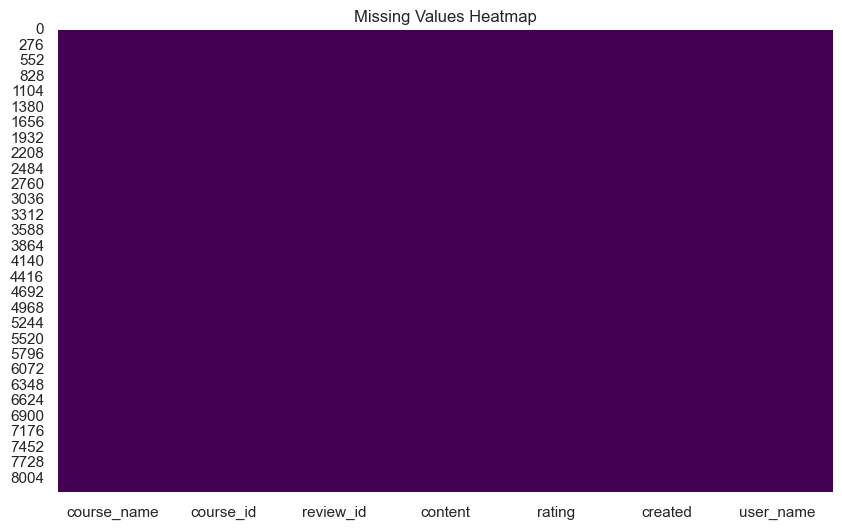

In [36]:
# Missing Values Analysis
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percent': missing_percent})
print("Missing Values Summary:")
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize Missingness (optional, if dataset is large, heatmap might be slow)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [37]:
# Handle missing text content (fill with empty string to avoid errors in text processing)
df['content'] = df['content'].fillna('')

## 3. Feature Engineering

In [38]:
# --- 3.1 Text-based Features ---
df['content'] = df['content'].astype(str)
df['review_length'] = df['content'].apply(len)
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

# Sentiment Polarity (using TextBlob)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_polarity'] = df['content'].apply(get_sentiment)

# --- 3.2 Time-based Features ---
if 'created' in df.columns:
    df['created'] = pd.to_datetime(df['created'], errors='coerce', utc=True)
    df['year'] = df['created'].dt.year
    df['month'] = df['created'].dt.month
    df['day'] = df['created'].dt.day
    df['day_of_week'] = df['created'].dt.day_name()


In [39]:
df.head()

,course_name,course_id,review_id,content,rating,created,user_name,review_length,word_count,sentiment_polarity,year,month,day,day_of_week
0,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,226057033,"Yes, the explanations are clear so far. I like...",4.0,2026-01-07 21:40:45+00:00,Eben-Ezer Dabire,103,19,0.066667,2026,1,7,Wednesday
1,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225873787,"amazing course...covers everything in detail, ...",5.0,2026-01-06 08:27:14+00:00,Shalin Garg,77,12,0.475000,2026,1,6,Tuesday
2,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225557731,affordable and good quality contents,4.5,2026-01-02 05:58:12+00:00,Rahul Shaw,36,5,0.700000,2026,1,2,Friday
3,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225401611,This is a very good course on Udemy that expla...,5.0,2025-12-30 18:03:44+00:00,Akash Gupta,444,67,0.431667,2025,12,30,Tuesday
4,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225181813,"In the Spark videos, there is a lack of explan...",4.0,2025-12-28 11:58:14+00:00,Menda Thavitinaidu,319,46,0.195000,2025,12,28,Sunday


## 4. Advanced Exploratory Data Analysis (EDA)

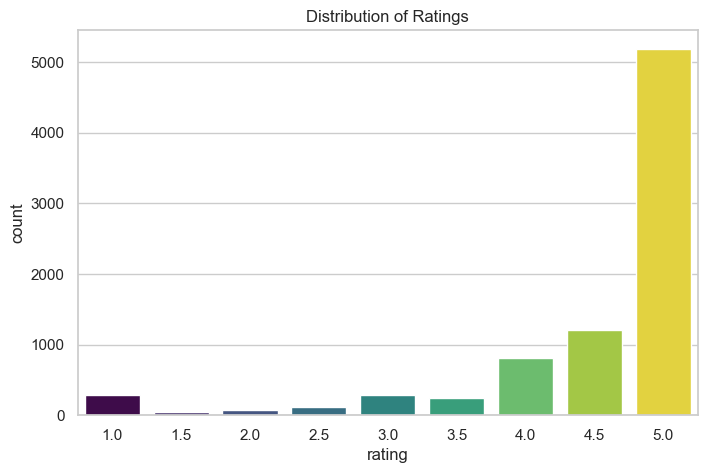

In [40]:
# 4.1 Rating Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, palette='viridis', hue='rating', legend=False)
plt.title('Distribution of Ratings')
plt.show()

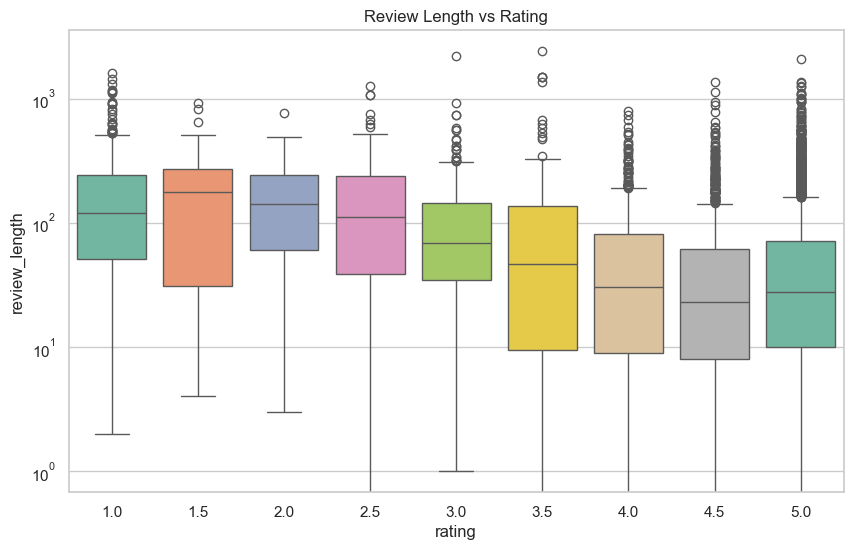

In [41]:
# 4.2 Review Length vs Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='review_length', data=df, palette='Set2', hue='rating', legend=False)
plt.title('Review Length vs Rating')
plt.yscale('log') # Log scale to handle outliers better
plt.show()

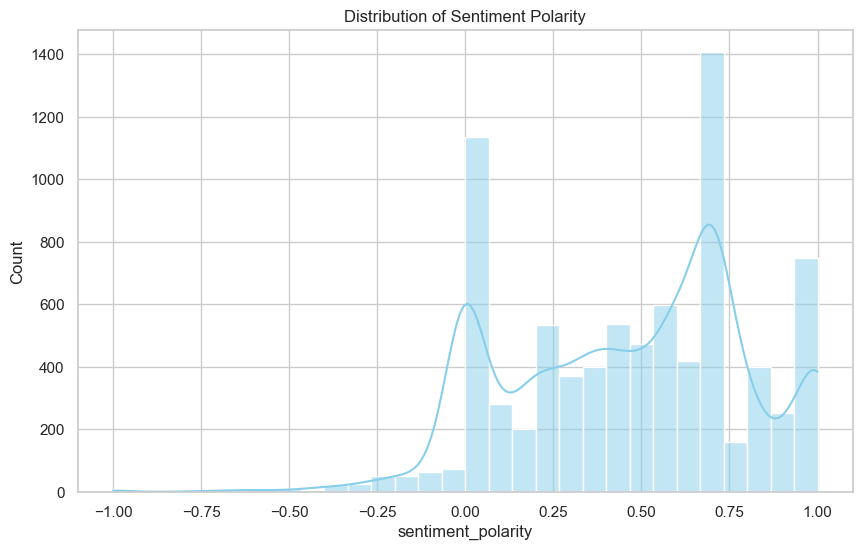

In [42]:
# 4.3 Sentiment Polarity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_polarity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Polarity')
plt.show()

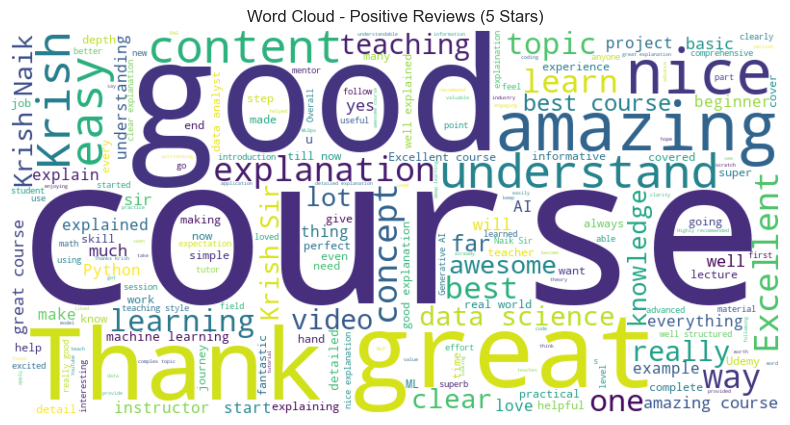

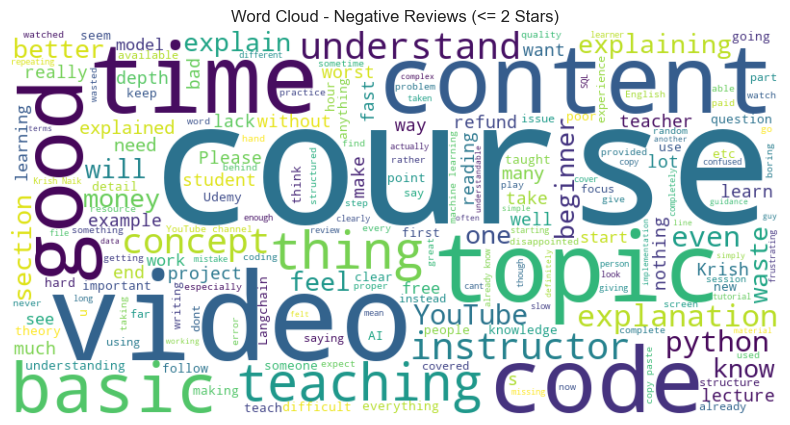

In [43]:
# 4.4 Word Clouds

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Positive Reviews (Rating = 5)
positive_text = ' '.join(df[df['rating'] == 5]['content'])
plot_wordcloud(positive_text, 'Word Cloud - Positive Reviews (5 Stars)')

# Negative Reviews (Rating <= 2)
negative_text = ' '.join(df[df['rating'] <= 2]['content'])
if len(negative_text) > 0:
    plot_wordcloud(negative_text, 'Word Cloud - Negative Reviews (<= 2 Stars)')
else:
    print("Not enough negative reviews to generate word cloud.")

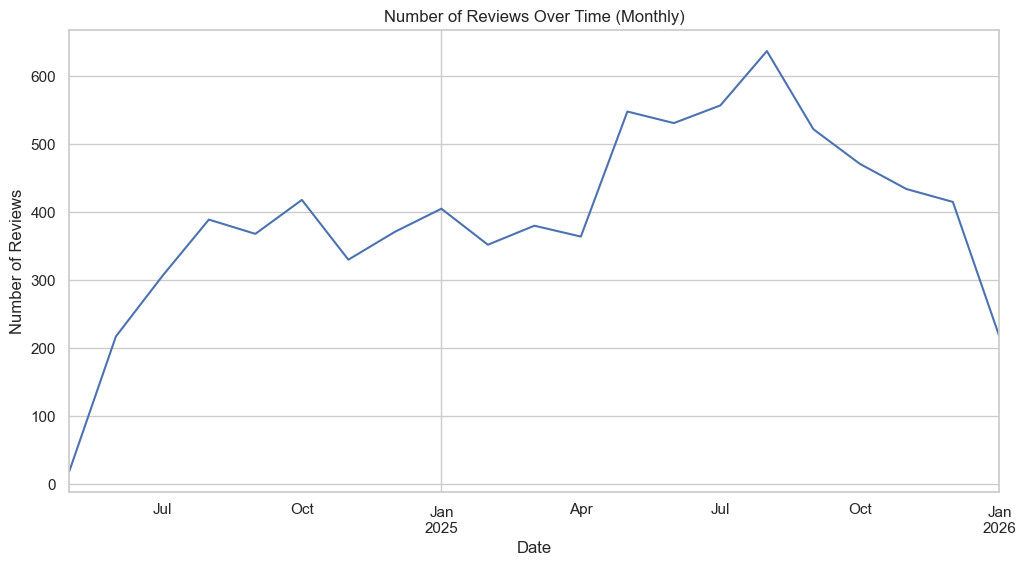

In [44]:
# 4.5 Temporal Analysis: Reviews over Time
reviews_over_time = df.set_index('created').resample('ME').size()
plt.figure(figsize=(12, 6))
reviews_over_time.plot()
plt.title('Number of Reviews Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()